# EDA YELP


In [1]:
import json
import os
import pandas as pd
import pickle
import pyarrow.parquet as pq
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Yelp - Archivo check in

En este archivo podemos ver las reservas, segun el business id y las fechas

In [2]:
df= pd.read_json(r'C:\Users\flori\Desktop\LOCAL\YELP\Yelp\checkin.json', lines=True)

In [14]:
df.head(10)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
5,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
6,--9osgUCSDUWUkoTLdvYhQ,"2015-06-13 02:00:57, 2015-07-04 00:44:09, 2015..."
7,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015..."
8,--FWWsIwxRwuw9vIMImcQg,"2010-09-11 16:28:39, 2010-12-22 21:14:19, 2011..."
9,--FcbSxK1AoEtEAxOgBaCw,"2017-08-18 19:43:50, 2017-10-07 22:38:38, 2017..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


Transformamos los datos a DATETIME y separamos la columna que tiene varios valores en una misma columna

In [19]:
# Dividir las fechas por la coma
df['date'] = df['date'].str.split(', ')

# Utilizar la función explode para separar las fechas en filas individuales
df = df.explode('date')

# Convertir la columna "fechas" a tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356875 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   date         datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 305.7+ MB


In [21]:
df.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
0,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
0,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
0,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33


Ahora hago nuevas columnas con año y dia para realizar sus respectivos graficos

In [23]:
df['dia_semana'] = df['date'].dt.day_name()

In [26]:
df['año'] = df['date'].dt.year

In [28]:
año= df[['año','business_id']].groupby('año').count()


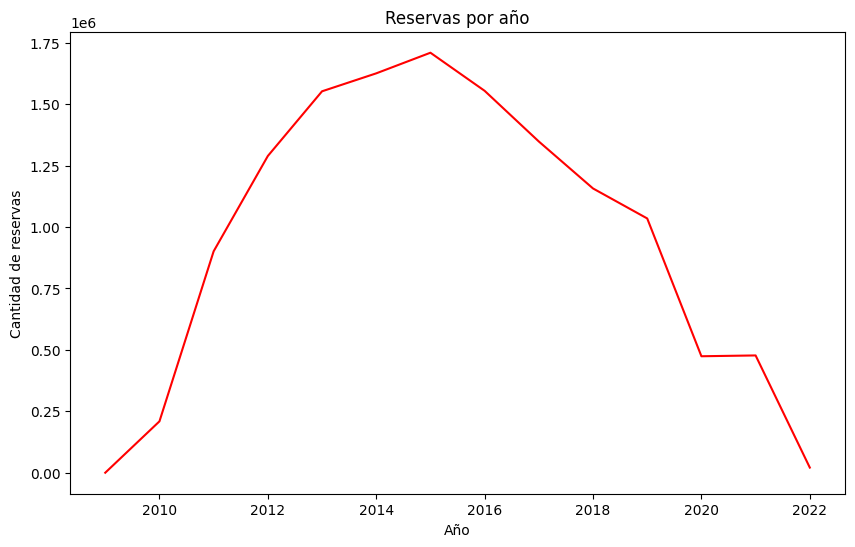

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=año, x='año', y= 'business_id', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reservas')
plt.title('Reservas por año')
plt.show()

In [30]:
dia= df[['dia_semana','business_id']].groupby('dia_semana').count()
dia_sorted= dia.sort_values(ascending=False, by='business_id')
dia_sorted7=dia_sorted.head(7)

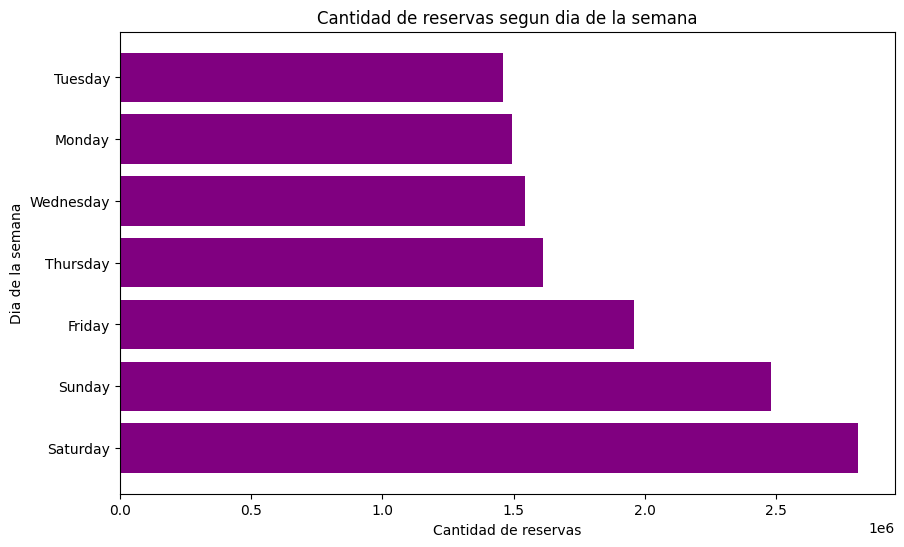

In [33]:
#Grafico el top 10 de categorias mas comentadas
plt.figure(figsize=(10, 6))
plt.barh(dia_sorted7.index, dia_sorted7['business_id'], color='purple')
plt.xlabel('Cantidad de reservas')
plt.ylabel('Dia de la semana')
plt.title('Cantidad de reservas segun dia de la semana')
plt.show()

Como era de esperar la mayor cantidad de reservas es durante el fin de semana, primero sabado, luego domingo y luevo viernes

# Yelp - Archivo reviews

In [3]:
### dsp con REVIEW
ruta_relativa2= 'C:/Users/flori/Desktop/LOCAL/YELP/review-001.json'


ruta_absoluta2 = os.path.abspath(ruta_relativa2)

In [4]:
import pandas as pd
import json

ruta_absoluta2 = ruta_relativa2  # Replace with the actual file path

data_list = []  # List to store data from the JSON file

# Specify the correct encoding when opening the file
with open(ruta_absoluta2, 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        try:
            datos = json.loads(linea)
            data_list.append(datos)  # Append the JSON data to the list
        except json.JSONDecodeError as e:
            print(f"JSON decoding error: {e}")

# Create a DataFrame from the list of JSON data
df2 = pd.DataFrame(data_list)

# Now, df2 contains the data from your JSON file in a DataFrame.


In [5]:
df2.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [11]:
# Vista de cantidad de datos en el df
df2.shape
print('El archivo reviews de yelp tiene las siguientes filas y columnas', df2.shape)

El archivo reviews de yelp tiene las siguientes filas y columnas (6990280, 9)


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [13]:
# No hay nulos
df2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [14]:
# de todos los datos hay casi 2m de usuarios, es decir que al menos cada usuario emitio 3 reviews aprox
df2.user_id.nunique()

1987929

In [ ]:
# Valores unicos por business. 150346 businesses unicos
df2.business_id.nunique()

In [ ]:
df2.text.nunique()

In [23]:
# El maximo de reviews para un lugar es de 7673 y el minimo 5 reviews
review_counts = df2.groupby('business_id')['review_id'].count().reset_index()
review_counts.sort_values(by = "review_id")

,business_id,review_id
80419,XHG8JXyUm4MgmrZ4BhqNdw,5
134824,tUpS1ztCfz7Q13-ZL-lCIQ,5
17736,6SFjEtUtLqZwd8bsMW71lQ,5
134826,tUr7rlfUGwrFVEiNulJXrQ,5
134827,tUrh1N3cIQmBf3TyVQ91mg,5
...,...,...
122423,oBNrLz4EDhiscSlbOl8uAw,5264
147782,ytynqOUb3hjKeJfRj5Tshw,5778
41309,GXFMD0Z4jEVZBCsbPf4CTQ,6160
90484,ac1AeYqs8Z4_e2X5M3if2A,7516


In [24]:
# Podriamos hacer un filtro que por ejemplo, para que la review sea valida tenga una cantidad mayor a x reviews y asi reducimos el df
review_counts[review_counts["review_id"]<20]

,business_id,review_id
1,--0iUa4sNDFiZFrAdIWhZQ,14
2,--30_8IhuyMHbSOcNWd6DQ,9
3,--7PUidqRWpRSpXebiyxTg,12
4,--7jw19RH9JKXgFohspgQw,13
8,--FWWsIwxRwuw9vIMImcQg,8
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,12
150342,zztOG2cKm87I6Iw_tleZsQ,6
150343,zzu6_r3DxBJuXcjnOYVdTw,8
150344,zzw66H6hVjXQEt0Js3Mo4A,5


In [25]:
# Conteo de la distribucion de estrellas otorgadas a los businesses

df2.stars.value_counts()

5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: stars, dtype: int64

In [26]:
# Ver como se distribuyen las clasificaciones de los reviews.
df2.pivot_table(index='business_id', columns='stars', values='review_id', aggfunc='count', fill_value=0)



stars,1.0,2.0,3.0,4.0,5.0
business_id,,,,,
---kPU91CF4Lq2-WlRu9Lw,1,0,2,4,17
--0iUa4sNDFiZFrAdIWhZQ,3,0,4,5,2
--30_8IhuyMHbSOcNWd6DQ,3,0,0,1,5
--7PUidqRWpRSpXebiyxTg,7,2,2,1,0
--7jw19RH9JKXgFohspgQw,2,0,1,0,10
...,...,...,...,...,...
zznZqH9CiAznbkV6fXyHWA,0,0,0,1,11
zztOG2cKm87I6Iw_tleZsQ,0,0,0,1,5
zzu6_r3DxBJuXcjnOYVdTw,0,1,2,4,1


In [27]:
df2.date.max()

'2022-01-19 19:48:45'

In [28]:
df2.date.min()

# Tenemos 17 años de review considerando los rangos de fecha

'2005-02-16 03:23:22'

In [29]:
df2.text.head(10)
# Aca NLP o ver que podriamos sacar de estos textos

0    If you decide to eat here, just be aware it is...
1    I've taken a lot of spin classes over the year...
2    Family diner. Had the buffet. Eclectic assortm...
3    Wow!  Yummy, different,  delicious.   Our favo...
4    Cute interior and owner (?) gave us tour of up...
5    I am a long term frequent customer of this est...
6    Loved this tour! I grabbed a groupon and the p...
7    Amazingly amazing wings and homemade bleu chee...
8    This easter instead of going to Lopez Lake we ...
9    Had a party of 6 here for hibachi. Our waitres...
Name: text, dtype: object

In [30]:
df2["useful"].unique()

array([   0,    1,    2,    4,    3,    7,   15,    5,   14,    6,   11,
         13,    8,    9,   10,   12,   16,   23,   18,   19,   34,   17,
         20,   61,   31,   91,   54,   21,   22,   28,   32,   25,   29,
         48,   33,   27,   46,   24,  171,   30,   44,   26,   70,   42,
         40,   39,   35,   38,  320,   41,   45,   37,   75,   36,   53,
         74,   49,   60,   43,   51,   52,   63,   58,  131,   55,  175,
         47,   56,   72,  305,  112,   71,   68,   69,  179,  124,   50,
         73,   66,   57,   65,  121,   82,  135,  132,   87,   98,   93,
        118,  539,  163,   79,  150,  102,   59,   89,  142,   64,   96,
         78,   86,   92,  109,  100,  120,  151,   77,  110,  111,  160,
         84,   80,   62,  114,  346,  152,  190,  123,  115,   81,  217,
        199,  197,   85,  149,  166,  105,  168,  169,   88,  292,  146,
         76,  225,  176,  144,  127,  126,  143,  177,  129,  187,   95,
        106,  148,  153,  156,  103,  137,  182,   

In [31]:
# sorted(df2["useful"].unique())
df2["useful"].unique().max()

1182

In [32]:

df2["useful"].unique().min()

-1

In Yelp reviews, the "useful" score is one of the three types of votes or feedback that users can give to a review to indicate its helpfulness. The three types of votes typically found on Yelp are:

Useful: Users can mark a review as "useful" if they find it informative or helpful. This is often used to highlight reviews that provide valuable information about a business, product, or service.

Funny: Users can mark a review as "funny" if they found it amusing or entertaining. This is typically used for reviews that have a humorous tone or anecdotal content.

Cool: Users can mark a review as "cool" if they think it's well-written, interesting, or otherwise noteworthy. It's a more general category for positive feedback.

Podes meterte en la pagina y darle como like o aprobacion a cada uno de los scores a estas reviews, lo cual si mucha gente lo vota es porque hay una mayoria que esta de acuerdo en si una review fue util, fue divertida y copada. Es decir que las reviews con alto score, son muy aprobadas por los usuarios


In [33]:
df2["funny"].unique()

array([  0,   2,   1,   5,   3,   4,   6,  12,  19,   9,   7,  10,  11,
        13,  26,   8,  25,  18,  15,  21,  16,  14,  24,  17,  22,  20,
        38,  27,  23,  98,  30,  32,  28,  39,  76,  33,  40,  44, 222,
       284,  46,  42,  34,  29,  37,  41,  88,  35,  48,  43,  54,  45,
        52,  58,  31,  68,  67,  65, 123,  62, 113, 242,  61,  57,  47,
        80,  53,  85,  75, 141,  36,  97, 105,  79,  78,  74, 133,  93,
       100,  71, 254,  63, 132,  49, 126,  83,  86,  81,  59,  55,  92,
        72, 101, 103,  50,  73,  91, 129, 130, 109,  82,  56, 107,  60,
        94, 114, 139, 110,  69, 169, 251, 200,  64, 143, 181, 179, 190,
       175, 277, 127, 167, 135, 256, 146, 112,  77, 152, 144, 235,  95,
       228, 240,  84,  99, 232,  89, 106, 202, 236, 116,  51,  87,  66,
       134, 283, 191, 117,  -1, 102, 131,  90, 104, 157, 155,  70, 159,
       150, 201, 121, 119, 227,  96, 266, 324, 154, 148, 180, 361, 241,
       326, 310, 287, 278, 332, 182, 307, 336, 342, 345, 341, 14

In [34]:
df2["funny"].max()

792

In [35]:
df2["funny"].min()

-1

In [36]:
df2["cool"].unique()

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,   8,  12,  11,  13,
        10,  44,  15,  14,  32,  17,  19,  23,  21,  26,  22,  27,  29,
        25,  49,  31,  16,  33,  24,  18,  41,  42,  20,  37,  35,  45,
        28,  63,  79,  30,  48,  43,  40,  52,  47,  34,  46,  38,  36,
       164,  70,  59,  39,  73,  75,  50,  61,  94,  74, 130,  58,  87,
        88,  56, 121,  53, 146,  60,  64,  51,  82, 142,  97,  66,  67,
        62,  77,  86,  89,  54,  83,  95, 125, 153, 105, 118, 111,  68,
       139, 109,  85,  80,  76,  55, 122, 145,  91, 152, 132,  99, 155,
        93, 140,  81,  92, 172, 123, 112, 106, 102,  69, 174, 201,  65,
        98, 120, 165, 114, 176, 141,  84, 151,  72, 147, 116,  57, 156,
       115, 149, 183, 117, 101, 158, 126, 113, 195, 104, 162, 103,  90,
        71,  78, 107, 136, 138, 110, 129, 127, 148,  -1, 154, 144,  96,
       159, 202, 157, 119, 196, 100, 185, 150, 124, 143, 137, 207, 169,
       134, 173, 128, 261, 131, 175, 108, 133, 205, 163, 359, 36

In [37]:
df2["cool"].max()

404

In [38]:
df2["cool"].min()

-1

# Yelp - Archivo businesses

In [39]:
ruta_relativa3 = 'C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/YELP/business.pkl'
# Obtener la ruta absoluta al archivo .pkl
ruta_absoluta3 = os.path.abspath(ruta_relativa3)



In [40]:
df_businesses = pd.read_pickle(ruta_relativa3)

In [41]:

df_businesses.shape

(150346, 28)

In [42]:
if os.path.exists(ruta_absoluta3):
    # Cargar el archivo .pkl en un DataFrame
    with open(ruta_absoluta3, 'rb') as archivo:
        df3 = pickle.load(archivo)

    # Ahora puedes trabajar con el DataFrame df
    print(df3)
else:
    print(f"El archivo {ruta_absoluta3} no existe.")



                   business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara   NaN       93101   
1       87 Grasso Plaza Shopping Center         Affton   NaN       63123   
2                  5255 E Broadway Blvd         Tuc

In [43]:
df_businesses.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,PA,33707,27.76659,-82.732983,3.5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_businesses.columns
# estan duplicadas las columnas, tienen 14, o sera normal est caso, me llamo la atencion

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [45]:
# Drop duplicate columns
df_businesses = df_businesses.loc[:, ~df_businesses.columns.duplicated()]

In [46]:
# ok
df_businesses.shape

(150346, 14)

In [47]:
# unique states
df_businesses.state.unique()

array([nan, 'CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV',
       'ID', 'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT',
       'MI', 'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [48]:
df_businesses.state.value_counts()

PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

In [49]:
# Arreglo los nan de state
df_businesses.state.isnull().sum()
df_businesses[df_businesses.state.isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [50]:
df_businesses.loc[df_businesses['city'] == 'Santa Barbara', 'state'] = 'CA'
df_businesses.loc[df_businesses['city'] == 'Affton', 'state'] = 'MO'
df_businesses.loc[df_businesses['city'] == 'Tucson', 'state'] = 'AZ'


In [51]:
df_businesses.state.isnull().sum()

0

In [52]:
### sera real tantos nulos??? o es por la forma de subirlo que hay algun error??????
df_businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150346 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [53]:
df_businesses_florida = df_businesses[df_businesses["state"]=="FL"]
df_businesses_florida

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.45738,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3..."
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,FL,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Vape Shops, Tobacco Shops, Personal Shopping, ...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.50878,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150281,yqwqLm27A0mxmBx_chTZhg,RadioShack,1305 W Chester Pike,Havertown,FL,19083,39.974556,-75.321163,2.5,5,0,"{'BusinessParking': '{'garage': False, 'street...","Hobby Shops, Shopping, Electronics, Mobile Phones","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
150283,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,FL,70065,30.033566,-90.23852,4.5,6,1,"{'RestaurantsTakeOut': 'True', 'DogsAllowed': ...","Mexican, Shaved Ice, Restaurants, Food, Food S...","{'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0'..."
150292,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL,33701,27.770872,-82.643069,4.5,38,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:..."
150295,jsTHopAoQFncD0pGoJQFrw,St John Neumann Center for Rehabilitation & He...,10400 Roosevelt Blvd,Philadelphia,FL,19116,40.098009,-75.012998,1.5,6,1,None,"Retirement Homes, Health & Medical, Hospice, R...",None


# Yelp - Archivo TIP

In [54]:
ruta_relativa4 = 'C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/YELP/tip.json'

ruta_absoluta4 = os.path.abspath(ruta_relativa4)

In [55]:
data_list = []  # List to store data from the JSON file

# Specify the correct encoding when opening the file
with open(ruta_absoluta4, 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        try:
            datos = json.loads(linea)
            data_list.append(datos)  # Append the JSON data to the list
        except json.JSONDecodeError as e:
            print(f"JSON decoding error: {e}")

# Create a DataFrame from the list of JSON data
df4 = pd.DataFrame(data_list)

# Now, df2 contains the data from your JSON file in a DataFrame.


In [56]:
df4.head(10)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
5,trf3Qcz8qvCDKXiTgjUcEg,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0
6,SMGAlRjyfuYu-c-22zIyOg,kH-0iXqkL7b8UXNpguBMKg,"Saturday, Dec 7th 2013, ride Patco's Silver Sl...",2013-12-03 23:42:15,0
7,YVBB9g23nuVJ0u44zK0pSA,jtri188kuhe_AuEOJ51U_A,This is probably the best place in the cool Sp...,2016-11-22 22:14:58,0
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,Tacos,2012-07-27 01:48:24,0
9,4ay-fdVks5WMerYL_htkGQ,pICJRcyqW1cF96Q3XhLSbw,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0


# YELP -Archivo User

In [58]:
ruta_relativa5 = 'C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/YELP/user.parquet'

# Obtener la ruta absoluta al archivo Parquet
ruta_absoluta5 = os.path.abspath(ruta_relativa5)

# Verificar si el archivo existe
if os.path.exists(ruta_absoluta5):
    # Cargar el archivo Parquet en un DataFrame
    df5 = pd.read_parquet(ruta_absoluta5)

    # Ahora puedes trabajar con el DataFrame df
    print(df5)
else:
    print(f"El archivo {ruta_absoluta5} no existe.")

MemoryError: 

In [ ]:
df5.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
6,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
7,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0
8,lO1iq-f75hnPNZkTy3Zerg,Rachelle,40,2008-12-29 22:40:56,109,40,46,,"tOQDlz36rI__SOsbL-HCag, 83Xb0PPBwZiG2c_fLpZgAw...",7,...,0,0,3,0,3,4,5,5,3,1
9,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0


In [ ]:
df5.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [ ]:
df5.shape

(2105597, 22)

In [ ]:
df5.user_id.nunique()

1987897

# Juntar data de Florida

In [59]:
# Business check in - Florida businesses info

check_in_con_info = pd.merge(df, df_businesses_florida, on='business_id', how='inner', suffixes=('_left', '_right'))
check_in_con_info

,business_id,fechas,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,---kPU91CF4Lq2-WlRu9Lw,"[2020-03-13 21:10:56, 2020-06-02 22:18:06, 202...",Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True...","Seafood, Restaurants, Latin American, Food, Fo...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
1,--epgcb7xHGuJ-4PUeSLAw,"[2010-10-01 16:31:41, 2010-12-16 19:13:47, 201...",Manhattan Bagel,200 York Road,Willow Grove,FL,19090,40.145054,-75.116293,3.0,34,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Restaurants, Food, Bagels, Sandwiches, Breakfa...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
2,--pDYWb4DzqKdAdrPcxuaA,"[2013-03-25 19:29:51, 2013-05-31 23:45:58, 201...",First Flight Wine Bar,Tampa International Airport,Tampa,FL,33604,28.014218,-82.416346,4.0,13,1,"{'NoiseLevel': ''average'', 'BikeParking': 'Fa...","Wine Bars, Nightlife, Bars",None
3,--rS-rnOIZxoiDA8yctWpQ,"[2021-08-21 15:16:06, 2021-08-30 01:04:13, 202...",Publix GreenWise Market,555 Channelside Dr,Tampa,FL,33602,27.943291,-82.45016,5.0,8,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Organic Stores, Food, Grocery, Shopping, Publi...","{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ..."
4,--seHXaJfDtWbmFSxkzaRg,"[2010-07-19 20:40:19, 2012-04-10 19:27:06]",Collingswood Dental Associates,610 Collings Ave,Collingswood,FL,08107,39.910771,-75.084177,5.0,5,1,{'ByAppointmentOnly': 'True'},"Health & Medical, Periodontists, Dentists, Cos...","{'Monday': '9:30-17:30', 'Tuesday': '8:30-19:3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21222,zymvTQ12tRy3bzmP4tPgOg,"[2019-04-20 17:50:43, 2019-04-22 22:20:51, 201...",Salt + Smoke,501 S Main St,Saint Charles,FL,63301,38.777849,-90.483287,4.0,368,1,"{'Caters': 'True', 'RestaurantsTakeOut': 'True...","Beer Bar, Sandwiches, Bars, Barbeque, Restaura...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
21223,zynDyrQvFZfbf5m4_Usl5g,"[2019-12-14 16:31:44, 2020-01-24 14:02:24, 202...",Smoke Sum,926 Canal St,New Orleans,FL,70112,29.954541,-90.071783,2.0,8,1,"{'WheelchairAccessible': 'True', 'BikeParking'...","Shopping, Tobacco Shops, Vape Shops, Head Shops","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."
21224,zzIF9qp2UoHN48EeZH_IDg,"[2013-07-15 01:36:36, 2016-02-19 23:31:08, 201...",Domino's Pizza,40188 US Hwy 19 N,Tarpon Springs,FL,34689,28.137368,-82.740846,3.0,19,1,"{'RestaurantsReservations': 'False', 'Ambience...","Italian, Restaurants, Pizza, Chicken Wings, Sa...","{'Monday': '10:30-1:0', 'Tuesday': '10:30-1:0'..."
21225,zzg-Il9zxsaVXlCDrcG7hg,"[2015-03-28 17:22:29, 2015-05-16 20:10:42, 201...",North End Organic Nursery,3777 W Chinden Blvd,Garden City,FL,83714,43.62589,-116.244516,5.0,16,1,"{'BusinessParking': '{'garage': False, 'street...","Home & Garden, Shopping, Nurseries & Gardening","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


In [60]:
# Business reviews - Florida businesses info

reviews_con_info = pd.merge(df2, df_businesses_florida, on='business_id', how='inner', suffixes=('_left', '_right'))
reviews_con_info

,review_id,user_id,business_id,stars_left,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_right,review_count,is_open,attributes,categories,hours
0,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
1,TP0HYy4GqYtrWMlFIhxw3A,YRsNXrlyvjnr7NLSDwen0Q,LHSTtnW3YHCeUkRDGyJOyw,1.0,4,2,0,We arrived a few minutes early for a 7pm reser...,2016-05-31 01:58:22,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
2,RkXe6gzU6bfut_Q2W2NpbA,jPaGpFevnH4y1BQGIe3glw,LHSTtnW3YHCeUkRDGyJOyw,5.0,0,0,0,This is one of my favorite restaurants. They h...,2017-12-02 23:28:30,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
3,Wv6ty8iRgaPtqRzQXQiDaA,V0RkSHN5nckzO6oPTCp6mw,LHSTtnW3YHCeUkRDGyJOyw,4.0,0,0,0,Let me start by saying that my wife and I are ...,2018-03-23 23:22:00,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
4,w0cb9xwH5KSgtTpP3DcIVg,yujZWE_uZn41f5-677Gvjg,LHSTtnW3YHCeUkRDGyJOyw,4.0,1,0,0,I wrote this a while ago but never posted it f...,2016-01-30 15:55:07,Fries Rebellion,...,FL,18951,40.407537,-75.338825,3.5,103,0,"{'RestaurantsAttire': ''casual'', 'Ambience': ...","Beer Bar, Bars, American (New), Gastropubs, Re...","{'Wednesday': '11:0-23:0', 'Thursday': '11:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106236,Rua2-9R0jNk2sAN6JdM43g,n9B9grVJBm0nSvKj0wTBNw,NSoT9z12S2wgJsZR-jfLRA,1.0,1,0,0,My package has been stuck in transit since Jan...,2022-01-14 22:39:21,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
1106237,to_ufQVO5UcKGEMsD1v8pw,OGey37DSAw5z6LLqafSt5A,NSoT9z12S2wgJsZR-jfLRA,1.0,1,0,0,I paid for an order to Shein on May 28th. (NOT...,2021-07-08 21:15:32,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
1106238,09Q32HZZf2_vJFnyHtYouQ,agyJKcnXp4PF9QBfCAKfXA,NSoT9z12S2wgJsZR-jfLRA,5.0,1,0,0,l A very nice driver. When I was on vacation a...,2022-01-15 20:02:35,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
1106239,1WYnufgEcMknv_wGI6zmCg,OGey37DSAw5z6LLqafSt5A,NSoT9z12S2wgJsZR-jfLRA,5.0,3,1,1,Literally like 20 minutes after i wrote a bunc...,2021-07-14 04:57:51,Uni Express,...,FL,T6N 1A8,53.460689,-113.487948,3.5,7,1,None,"Local Services, Couriers & Delivery Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."


In [62]:
# TIP CON INFO


TIP_con_info = pd.merge(df4, df_businesses_florida, on='business_id', how='inner', suffixes=('_left', '_right'))
TIP_con_info


,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
1,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
2,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
3,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban san...,2016-10-02 16:53:40,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
4,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,My last time. Continental and a Cuban,2012-11-09 18:51:34,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146550,Pq4QPhMlCnnqaV2qHRxCAQ,MtFOOKu3JXClmUEDOCQKFA,Avoid giving any of your hard earned money to ...,2019-12-09 17:02:59,0,Cherry Hill Programs,"4 E Stow Rd, Ste 1",Marlton,FL,08053,39.912606,-74.93051,1.0,64,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Flowers & Gifts, Shopping Centers, Photographe...",None
146551,8sEgbyJpSW6V53-NrBCC-A,AcLpmxOw1oWlSauNTdZYZA,Do not go here.,2020-01-11 05:15:09,0,AT&T Store,1831 Manhattan Blvd,Harvey,FL,70058,29.887346,-90.055146,3.0,10,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Local Services, Mobile Phone Accessories, Mobi...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
146552,hN-i9S5J4gCRM8sKAh-Eyw,WnGA31QM-srnNrXHLc81dQ,Great job and timely responses,2021-04-18 02:14:10,0,Spökhund Cleaning,,Nashville,FL,37209,36.158887,-86.782056,5.0,8,1,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Window Washing, Carpet Cleaning, Local Service...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
146553,2dILt0X5cpNb8reAxVXMyA,VEsb_ByMJkuCEDURgfLBDg,Beth you're the BEST!!!,2017-03-31 05:28:02,0,Lilibeth Salon Hair & Makeup,"1485 E Valley Rd, Ste 10 - 50601",Montecito,FL,93108,34.436552,-119.633196,4.5,23,1,"{'WheelchairAccessible': 'False', 'BikeParking...","Nail Salons, Hair Salons, Waxing, Beauty & Spa...",{'Thursday': '10:0-12:0'}
